In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
(train_data, train_targets), (test_data, test_targets) = keras.datasets.boston_housing.load_data()

In [3]:
train_data.shape

(404, 13)

In [4]:
train_targets.shape

(404,)

404개의 data points <br>
13개의 독립변수

In [5]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [6]:
train_targets[:5]

array([15.2, 42.3, 50. , 21.1, 17.7])

종속변수는 미국 Boston에 속한 도시들의 70년대 중반 집들의 중간값 <br>
data point는 도시 <br>
독립변수는 범죄율, 교통 편의성 등 <br>
10 = > $ 10K

In [7]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [8]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [9]:
train_data.shape

(404, 13)

In [10]:
model = models.Sequential()

In [11]:
model.add(layers.Dense(64, activation = 'relu', kernel_initializer = 'glorot_uniform', input_shape=(train_data.shape[1],)))

In [12]:
model.add(layers.Dense(64, activation = 'relu', kernel_initializer = 'glorot_uniform'))

In [13]:
model.add(layers.Dense(1))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


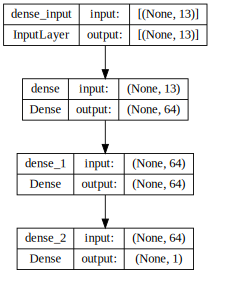

In [15]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model, show_shapes= True, show_layer_names=True, dpi=65).create(prog='dot', format='svg'))

SGD optimizer 사용하기

In [16]:
sgd= tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

In [17]:
model.compile(optimizer=sgd, loss='mse')

In [18]:
history = model.fit(train_data, train_targets, epochs=80, batch_size=64)

Epoch 1/80
7/7 [==============================] - 1s 1ms/step - loss: 427.6581
Epoch 2/80
7/7 [==============================] - 0s 1ms/step - loss: 49.7672
Epoch 3/80
7/7 [==============================] - 0s 997us/step - loss: 21.7968
Epoch 4/80
7/7 [==============================] - 0s 2ms/step - loss: 14.9289
Epoch 5/80
7/7 [==============================] - 0s 2ms/step - loss: 11.3206
Epoch 6/80
7/7 [==============================] - 0s 1ms/step - loss: 10.7572
Epoch 7/80
7/7 [==============================] - 0s 1ms/step - loss: 9.5548
Epoch 8/80
7/7 [==============================] - 0s 1ms/step - loss: 8.9982
Epoch 9/80
7/7 [==============================] - 0s 2ms/step - loss: 8.7040
Epoch 10/80
7/7 [==============================] - 0s 2ms/step - loss: 8.2618
Epoch 11/80
7/7 [==============================] - 0s 2ms/step - loss: 8.0483
Epoch 12/80
7/7 [==============================] - 0s 2ms/step - loss: 7.9870
Epoch 13/80
7/7 [==============================] - 0s 2ms/step -

## Loss 값 변화 살펴보기

In [19]:
import matplotlib.pyplot as plt

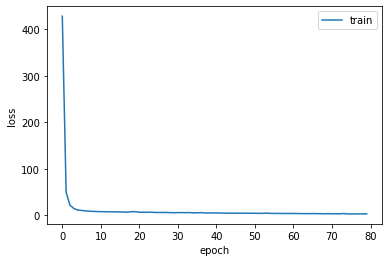

In [20]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train'])
plt.show()

# 성능 평가하기

In [21]:
test_data.shape

(102, 13)

In [22]:
y_pred = model.predict(test_data)

4/4 [==============================] - 0s 2ms/step


In [23]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_targets, y_pred)**0.5

3.699098467729594

In [24]:
from sklearn.metrics import r2_score
r2_score(test_targets, y_pred)

0.835623535945665